# Coveid19 Time Series Problem

# Problem Statement:
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.

# Guidelines:
● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# df=pd.read_csv('covid_19.csv')
# df
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Intellipaath Dataset/Covid19-Time-series/covid_19.csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,49068.0,21.433730,24.950320,-51.7963,7.873054,23.6345,41.204380,7.170690e+01
Long,49068.0,23.528236,70.442740,-135.0000,-15.310100,21.7453,80.771797,1.780650e+02
Confirmed,49068.0,16884.904255,127300.205272,0.0000,4.000000,168.0000,1518.250000,4.290259e+06
Deaths,49068.0,884.179160,6313.584411,0.0000,0.000000,2.0000,30.000000,1.480110e+05
Recovered,49068.0,7915.713479,54800.918731,0.0000,0.000000,29.0000,666.000000,1.846641e+06
Active,49068.0,8085.011617,76258.903026,-14.0000,0.000000,26.0000,606.000000,2.816444e+06


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Province/State,14664,78,Australian Capital Territory,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,49068,187,China,6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,49068.0,NaN,NaN,NaN,21.43373,24.95032,-51.7963,7.873054,23.6345,41.20438,71.7069
Long,49068.0,NaN,NaN,NaN,23.528236,70.44274,-135.0,-15.3101,21.7453,80.771797,178.065
Date,49068,188,2020-01-22,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmed,49068.0,NaN,NaN,NaN,16884.904255,127300.205272,0.0,4.0,168.0,1518.25,4290259.0
Deaths,49068.0,NaN,NaN,NaN,884.17916,6313.584411,0.0,0.0,2.0,30.0,148011.0
Recovered,49068.0,NaN,NaN,NaN,7915.713479,54800.918731,0.0,0.0,29.0,666.0,1846641.0
Active,49068.0,NaN,NaN,NaN,8085.011617,76258.903026,-14.0,0.0,26.0,606.0,2816444.0
WHO Region,49068,6,Europe,15040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
# Now we need to rename the two columns

In [ ]:
df.rename(columns ={'Province/State':'State','Country/Region':'Country'},inplace = True)
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
# Data of the last Date

In [ ]:
df['Date'].max()

'2020-07-27'

In [ ]:
df_top = df[df['Date'] == df['Date'].max()]
df_top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df_top.Date.unique()

array(['2020-07-27'], dtype=object)

In [ ]:
df_top.Date.nunique()

1

In [ ]:
# Now we groupby the Confirmed, Deaths,Recovered,Active on the base of country
# because suppose india comes 10 time in dataset so at that time we need to group them

In [ ]:
grouped_df= df_top.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
grouped_df
# now it give each country information

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
import plotly.express as px

In [ ]:
# now draw the word map

In [ ]:
x = px.choropleth(grouped_df,locations = 'Country', locationmode = 'country names', color = 'Deaths', hover_name = 'Country' ,
                  range_color = [1,4000],color_continuous_scale='Peach', title='Deths cases country wise')
x.show()

In [ ]:
x = px.choropleth(grouped_df,locations = 'Country', locationmode = 'country names', color = 'Deaths', hover_name = 'Country' ,
                  range_color = [1,4000],color_continuous_scale='Viridis', title='Deths cases country wise')
x.show()

In [ ]:
# Now we convert date column in the date datatype

In [ ]:
df['Date']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
49063    2020-07-27
49064    2020-07-27
49065    2020-07-27
49066    2020-07-27
49067    2020-07-27
Name: Date, Length: 49068, dtype: object

In [ ]:
df['Date'].dtype

dtype('O')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
# now need to convert format of the date

In [ ]:
df['Date'] = df['Date'].dt.date
# now it take default date format 'yyyy-mm-dd'

In [ ]:
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
x_active = px.choropleth(grouped_df,locations = 'Country', locationmode = 'country names', color = 'Active', hover_name = 'Country' ,
                  range_color = [1,4000],color_continuous_scale='Peach', title='Active cases country wise')
x_active.show()

In [ ]:
x_confirmed = px.choropleth(grouped_df,locations = 'Country', locationmode = 'country names', color = 'Confirmed', hover_name = 'Country' ,
                  range_color = [1,4000],color_continuous_scale='Peach', title='Confirmed cases country wise')
x_confirmed.show()

In [ ]:
x_recovered = px.choropleth(grouped_df,locations = 'Country', locationmode = 'country names', color = 'Recovered', hover_name = 'Country' ,
                  range_color = [1,4000],color_continuous_scale='Peach', title='Recovered cases country wise')
x_recovered.show()

In [ ]:
x_recovered = px.choropleth(df,locations = 'Country', locationmode = 'country names', color = 'Recovered', hover_name = 'Country' ,
                  range_color = [1,4000],animation_frame = 'Date' ,color_continuous_scale='Peach', title='Recovered cases country wise')
x_recovered.show()
# it is form show the animation

In [ ]:
# Now i show according to the Date how many cases comes

In [ ]:
confirmed_cases_according_date =df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed_cases_according_date
# it group the data according to Date

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


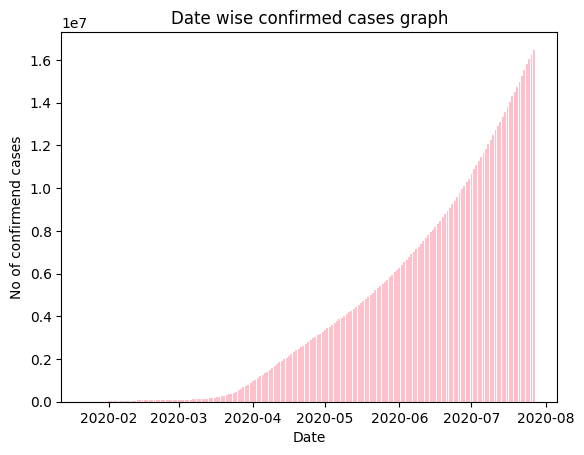

In [ ]:
plt.bar(confirmed_cases_according_date['Date'],confirmed_cases_according_date['Confirmed'],color='pink')
plt.xlabel('Date')
plt.ylabel('No of confirmend cases')
plt.title('Date wise confirmed cases graph')
plt.show()

In [ ]:
active_cases_according_date = df.groupby('Date')['Active'].sum().reset_index()
active_cases_according_date
# it group the data according to year

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


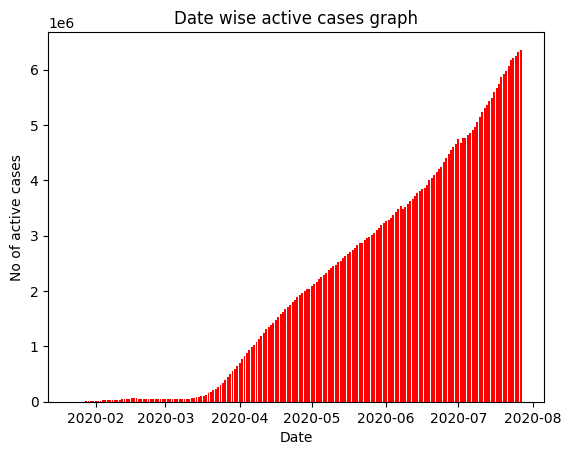

In [ ]:
plt.bar(active_cases_according_date['Date'],active_cases_according_date['Active'],color='red')
plt.xlabel('Date')
plt.ylabel('No of active cases')
plt.title('Date wise active cases graph')
plt.show()

In [ ]:
death_cases_according_date = df.groupby('Date')['Deaths'].sum().reset_index()
death_cases_according_date

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


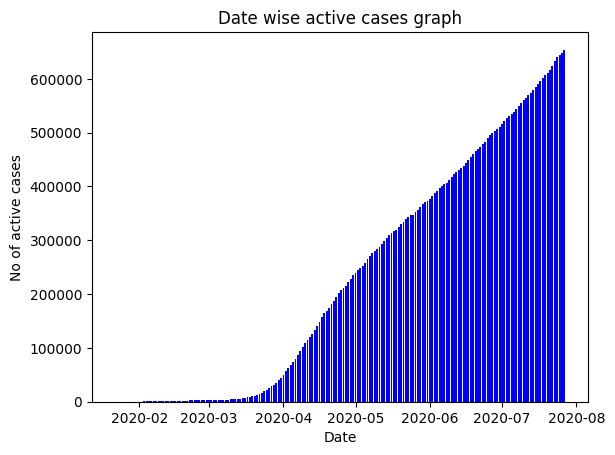

In [ ]:
plt.bar(death_cases_according_date['Date'],death_cases_according_date['Deaths'],color='blue')
plt.xlabel('Date')
plt.ylabel('No of active cases')
plt.title('Date wise active cases graph')
plt.show()

In [ ]:
recovered_cases_according_date = df.groupby('Date')['Recovered'].sum().reset_index()
recovered_cases_according_date

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
# Now we get top 20 country with active cases

In [ ]:
active_cases_country = grouped_df.groupby('Country')['Active'].sum().reset_index()
active_cases_country

,Country,Active
0,Afghanistan,9796
1,Albania,1991
2,Algeria,7973
3,Andorra,52
4,Angola,667
...,...,...
182,West Bank and Gaza,6791
183,Western Sahara,1
184,Yemen,375
185,Zambia,1597


In [ ]:
active_cases = active_cases_country.sort_values(by='Active',ascending = False)
active_cases

,Country,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
...,...,...
75,Holy See,0
143,San Marino,0
24,Brunei,0
49,Dominica,0


In [ ]:
top_20_country_active_cases = active_cases[:20]
top_20_country_active_cases

,Country,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
154,South Africa,170537
37,Colombia,117163
61,France,108928
32,Canada,107514
132,Peru,98752


In [ ]:
# Now for this we draw the box plot

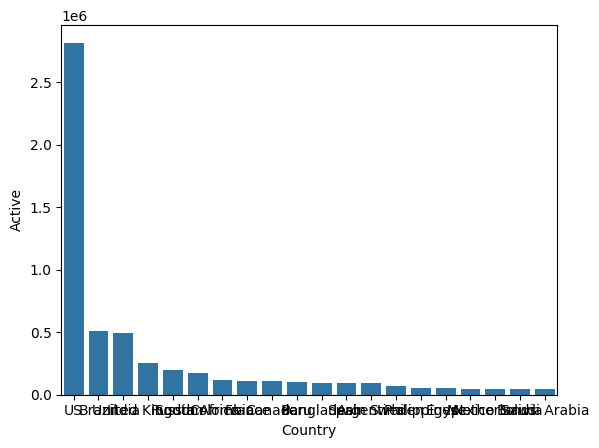

In [ ]:
sns.barplot(x='Country',y='Active', data = top_20_country_active_cases)
plt.show()

In [ ]:
# Now we are using facebook Prophet
# so first of all install the library

In [ ]:
recovered_cases_according_date # recovery rate according to date wise
death_cases_according_date   # death case according to date wise
active_cases_according_date  # active case according to date wise
confirmed_cases_according_date  # confirmed cases according to datewise

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
!pip install Prophet

In [ ]:
from prophet import Prophet

In [ ]:
# So before apply the Prophet we need to convert columns as DS and y

In [ ]:
# first of all we apply it on confirmed_cases

In [ ]:
confirmed_cases_according_date.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
confirmed_cases_according_date.columns = ['ds','y']

In [ ]:
confirmed_cases_according_date.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
# now ensure that and convert ds( Datetime Stamp) and we convert it in to datetime

In [ ]:
confirmed_cases_according_date['ds'] = pd.to_datetime(confirmed_cases_according_date['ds'])
confirmed_cases_according_date.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
confirmed_cases_according_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [ ]:
# Now we apply the Model

In [ ]:
model = Prophet()

In [ ]:
model.fit(confirmed_cases_according_date)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22dule01/zlgfy8ev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22dule01/95wapwha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56491', 'data', 'file=/tmp/tmp22dule01/zlgfy8ev.json', 'init=/tmp/tmp22dule01/95wapwha.json', 'output', 'file=/tmp/tmp22dule01/prophet_modelr1i5xr2b/prophet_model-20240518105245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_7_days = model.make_future_dataframe(periods = 7, freq = 'D')
future_7_days

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
# Now we forcaust the data

In [ ]:
forcast = model.predict(future_7_days)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.261316e+05,8.193699e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.096192e+05,1.009985e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.020481e+05,1.146889e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-8.322790e+04,1.184907e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.005290e+05,1.063511e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663604e+07,1.685310e+07,1.674165e+07,1.675039e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685541e+07,1.707379e+07,1.694052e+07,1.696039e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705873e+07,1.727820e+07,1.713873e+07,1.717169e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725269e+07,1.747184e+07,1.733450e+07,1.738559e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
forcast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forcast[['yhat','yhat_upper','yhat_lower']] = forcast[['yhat','yhat_upper','yhat_lower']].astype('int')

In [ ]:
forcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          195 non-null    datetime64[ns]
 1   trend                       195 non-null    float64       
 2   yhat_lower                  195 non-null    int64         
 3   yhat_upper                  195 non-null    int64         
 4   trend_lower                 195 non-null    float64       
 5   trend_upper                 195 non-null    float64       
 6   additive_terms              195 non-null    float64       
 7   additive_terms_lower        195 non-null    float64       
 8   additive_terms_upper        195 non-null    float64       
 9   weekly                      195 non-null    float64       
 10  weekly_lower                195 non-null    float64       
 11  weekly_upper                195 non-null    float64       

In [ ]:
forcast[['yhat','yhat_upper','yhat_lower']]

,yhat,yhat_upper,yhat_lower
0,-20676,81936,-126131
1,-8050,100998,-109619
2,5827,114688,-102048
3,12176,118490,-83227
4,8405,106351,-100529
...,...,...,...
190,16743908,16853097,16636037
191,16959097,17073788,16855411
192,17166757,17278197,17058728
193,17364296,17471838,17252691


In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-126131,81936,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-20676
1,2020-01-23,-6.933404e+03,-109619,100998,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8050
2,2020-01-24,-4.253528e+03,-102048,114688,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5827
3,2020-01-25,-1.573651e+03,-83227,118490,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,12176
4,2020-01-26,1.106226e+03,-100529,106351,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,16636037,16853097,1.674165e+07,1.675039e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,16743908
191,2020-07-31,1.694902e+07,16855411,17073788,1.694052e+07,1.696039e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,16959097
192,2020-08-01,1.715301e+07,17058728,17278197,1.713873e+07,1.717169e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,17166757
193,2020-08-02,1.735700e+07,17252691,17471838,1.733450e+07,1.738559e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,17364296


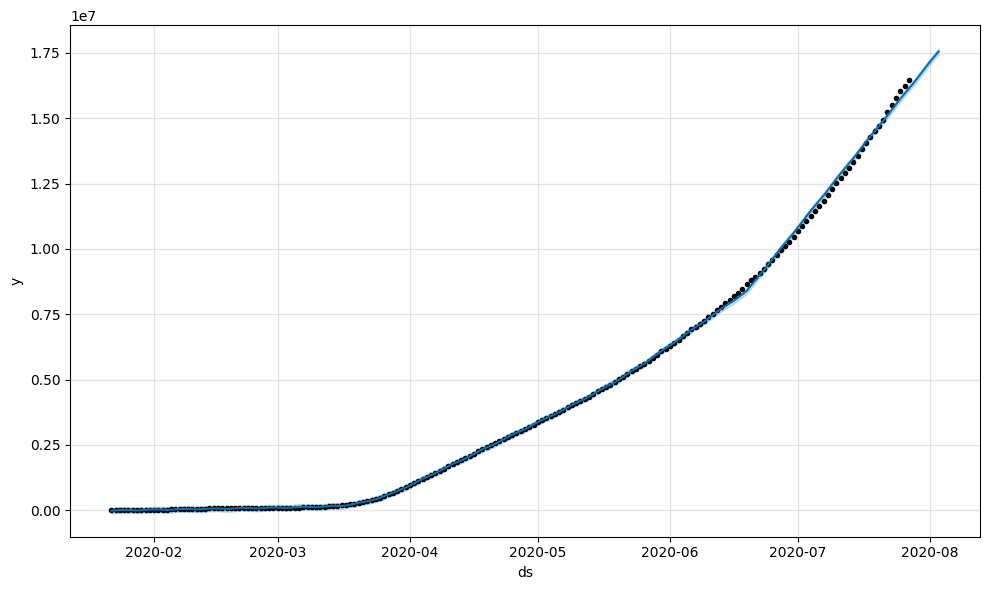

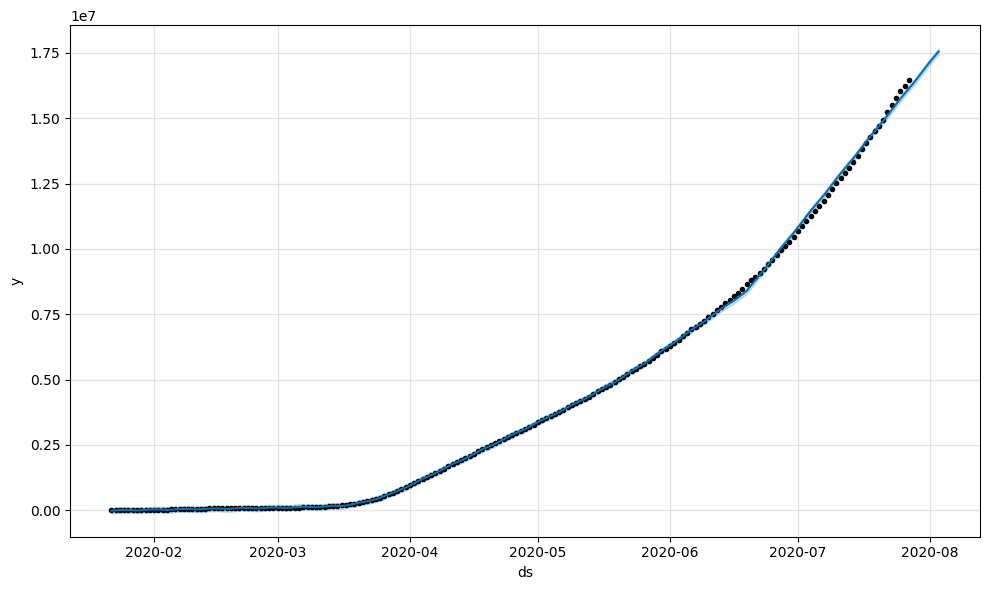

In [ ]:
model_graph = model.plot(forcast)
model_graph

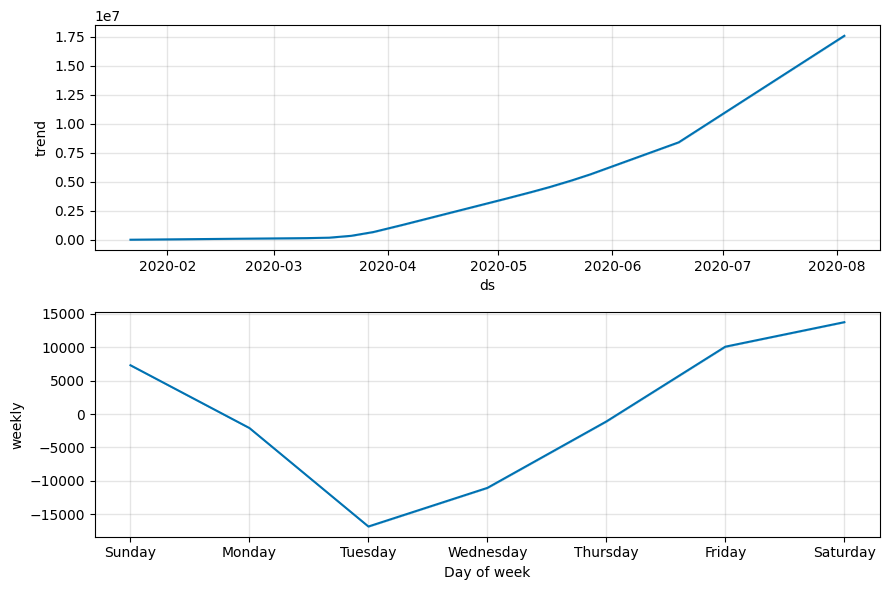

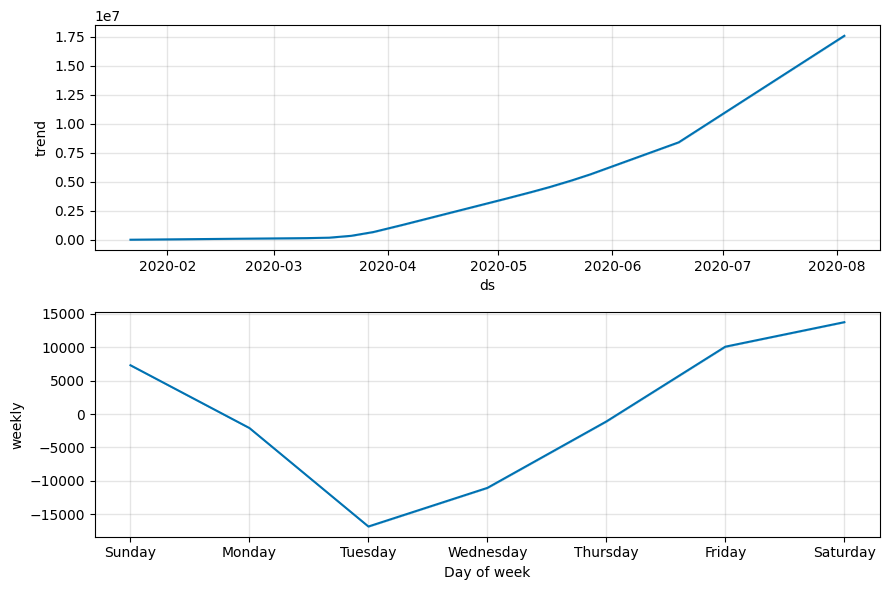

In [ ]:
model.plot_components(forcast)